In [105]:
import os
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [106]:
data_dir = '../../pilot data/'
subj_id = 3
blocks = [1,2,3,4,5,6]

In [107]:
data = []
for block in blocks:
    fn = glob.glob(os.path.join(data_dir, '3_*_block-%d.csv' %(block)))[0]
    data.append(pd.read_csv(fn))
    
data = pd.concat(data)
# force RT as numeric
data['rt'] = pd.to_numeric(data['rt'], errors='coerce')

# Code choices better: what direction was chosen?
data['choice_direction'] = np.nan
data.loc[data['response']=='m', 'choice_direction'] = 'right'
data.loc[data['response']=='z', 'choice_direction'] = 'left'
# what symbol was chosen?
data['choice_symbol'] = np.nan
data.loc[data['response']=='m', 'choice_symbol'] = data.loc[data['response']=='m', 'stim_right']
data.loc[data['response']=='z', 'choice_symbol'] = data.loc[data['response']=='z', 'stim_left']
# was this the high or low probability symbol?
data['choice_is_highp'] = np.nan
data.loc[data['choice_symbol']==data['stim_high'], 'choice_is_highp'] = 1
data.loc[data['choice_symbol']==data['stim_low'], 'choice_is_highp'] = 0

data.head()

,TrialNumber,stim_right,trial_ID,annotate,stim_high,stimulus_set,stim_left,phase_7,phase_6,phase_5,...,jitter_time_1,cue_time,jitter_time_2,stimulus_time,selection_time,feedback_time,iti_time,choice_direction,choice_symbol,choice_is_highp
0,1,A,0,False,A,2,B,0.727282,0.75,0.5,...,32.677616,32.677643,32.677650,33.462505,33.962944,34.730495,34.963497,left,B,0.0
1,2,J,1,False,J,0,K,0.515225,0.75,0.5,...,34.966560,34.966568,34.966570,35.629417,36.130287,36.880447,36.980660,right,J,1.0
2,3,K,2,False,J,0,J,0.780029,0.75,0.5,...,36.984222,36.984230,36.984238,37.597248,38.098824,38.849160,39.131954,left,J,1.0
3,4,K,3,False,J,0,J,0.616301,0.75,0.5,...,39.135338,39.135345,39.135353,39.950410,40.466500,41.216830,41.333324,left,J,1.0
4,5,M,4,False,M,1,N,0.807205,0.75,0.5,...,41.336720,41.336730,41.336740,42.150673,42.652500,43.402668,43.719320,left,N,0.0


### Some checks:
1. Were the stimuli always presented equally often in each position?
2. Equal speed/accuracy trials?
3. How long did this take?
4. Frame intervals OK?

1.

In [108]:
print(data.groupby('stim_right')['stim_right'].count())
print(data.groupby('stim_left')['stim_left'].count())

stim_right
A    62
B    64
J    65
K    63
M    64
N    66
O    65
P    63
W    65
X    64
c    63
e    64
Name: stim_right, dtype: int64
stim_left
A    64
B    62
J    63
K    65
M    66
N    64
O    63
P    65
W    64
X    65
c    64
e    63
Name: stim_left, dtype: int64


2.

In [109]:
data.groupby('cue')['cue'].count()

cue
ACC    190
SPD    194
Name: cue, dtype: int64

3.

In [110]:
data.iloc[-1].iti_time/60

36.42218333333334

4.

In [111]:
with open('../../pilot data/3_3_2018-11-01_10.35.15_block-all_frameintervals.log', 'r') as f:
    intervals = f.read().split(', ')
intervals = [float(x) for x in intervals]

Text(0.5,1,'Mean=16.8ms, s.d.=12.40, 99%CI(frame)=-15.22-48.75')

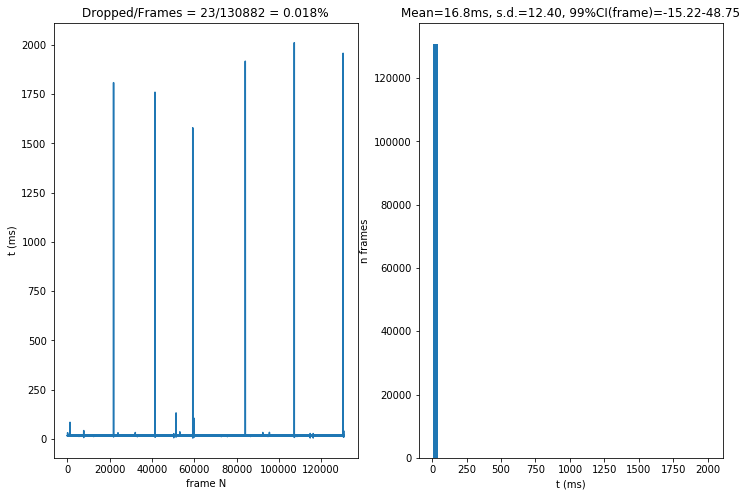

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline
# Make a nice figure
intervals_ms = np.array(intervals) * 1000
m = np.mean(intervals_ms)
sd = np.std(intervals_ms)

msg = "Mean=%.1fms, s.d.=%.2f, 99%%CI(frame)=%.2f-%.2f"
dist_string = msg % (m, sd, m - 2.58 * sd, m + 2.58 * sd)
n_total = len(intervals_ms)
n_dropped = sum(intervals_ms > (1.5 * m))
msg = "Dropped/Frames = %i/%i = %.3f%%"
dropped_string = msg % (n_dropped, n_total, 100 * n_dropped / float(n_total))

# plot the frame intervals
plt.figure(figsize=[12, 8])
plt.subplot(1, 2, 1)
plt.plot(intervals_ms, '-')
plt.ylabel('t (ms)')
plt.xlabel('frame N')
plt.title(dropped_string)

plt.subplot(1, 2, 2)
plt.hist(intervals_ms, 50, normed=0, histtype='stepfilled')
plt.xlabel('t (ms)')
plt.ylabel('n frames')
plt.title(dist_string)
#plt.savefig(output_fn_frames + '_frameintervals.png')

### Look at data
First, without SPD/ACC

In [113]:
data_vanilla = data.loc[pd.isnull(data.cue)].copy()
data_vanilla.head()

,TrialNumber,stim_right,trial_ID,annotate,stim_high,stimulus_set,stim_left,phase_7,phase_6,phase_5,...,jitter_time_1,cue_time,jitter_time_2,stimulus_time,selection_time,feedback_time,iti_time,choice_direction,choice_symbol,choice_is_highp
0,1,A,0,False,A,2,B,0.727282,0.75,0.5,...,32.677616,32.677643,32.677650,33.462505,33.962944,34.730495,34.963497,left,B,0.0
1,2,J,1,False,J,0,K,0.515225,0.75,0.5,...,34.966560,34.966568,34.966570,35.629417,36.130287,36.880447,36.980660,right,J,1.0
2,3,K,2,False,J,0,J,0.780029,0.75,0.5,...,36.984222,36.984230,36.984238,37.597248,38.098824,38.849160,39.131954,left,J,1.0
3,4,K,3,False,J,0,J,0.616301,0.75,0.5,...,39.135338,39.135345,39.135353,39.950410,40.466500,41.216830,41.333324,left,J,1.0
4,5,M,4,False,M,1,N,0.807205,0.75,0.5,...,41.336720,41.336730,41.336740,42.150673,42.652500,43.402668,43.719320,left,N,0.0


In [114]:
np.sort(data_vanilla.stimulus_set.unique())

array([0, 1, 2])

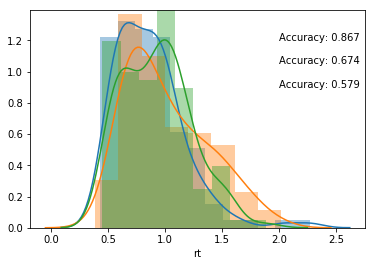

In [115]:
for i in np.sort(data_vanilla.stimulus_set.unique()):
    rts = data_vanilla.loc[(data_vanilla['stimulus_set']==i) & pd.notnull(data_vanilla.rt), 'rt']
    acc = data_vanilla.loc[(data_vanilla['stimulus_set']==i) & pd.notnull(data_vanilla.rt), 'choice_is_highp'].mean()
    sns.distplot(data_vanilla.loc[(data_vanilla['stimulus_set']==i) & pd.notnull(data_vanilla.rt), 'rt'])
    plt.text(2.0, 1.2-0.15*i, s='Accuracy: %.3f' %acc)

with SAT

In [121]:
data_sat = data.loc[pd.notnull(data.cue)].copy()
data_sat.head()

,TrialNumber,stim_right,trial_ID,annotate,stim_high,stimulus_set,stim_left,phase_7,phase_6,phase_5,...,jitter_time_1,cue_time,jitter_time_2,stimulus_time,selection_time,feedback_time,iti_time,choice_direction,choice_symbol,choice_is_highp
0,1,P,0,False,O,5,O,0.737220,0.75,0.5,...,1014.56230,1015.3125,1015.31250,1015.94610,1016.4477,1017.21375,1017.46440,right,P,0.0
1,2,c,1,False,c,4,e,0.840821,0.75,0.5,...,1017.46765,1018.2315,1018.23157,1018.89886,1019.4158,1020.16620,1020.51650,left,e,0.0
2,3,W,2,False,W,3,X,0.584220,0.75,0.5,...,1020.51850,1021.2829,1021.28290,1021.88324,1022.3839,1023.13430,1023.23456,left,X,0.0
3,4,c,3,False,c,4,e,0.548274,0.75,0.5,...,1023.23785,1024.0017,1024.00170,1024.85340,1025.3698,1026.12020,1026.23680,left,e,0.0
4,5,O,4,False,O,5,P,0.638486,0.75,0.5,...,1026.23940,1027.0042,1027.00420,1027.65540,1028.1715,1028.92260,1029.07260,left,P,0.0


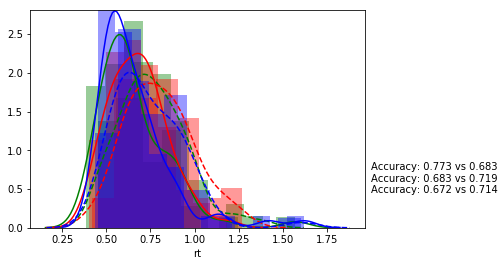

In [135]:
for coln, i in enumerate(np.sort(data_sat.stimulus_set.unique())):
    color = ['green', 'red', 'blue'][coln]
    accs = []
    for ii, cue in enumerate(['SPD', 'ACC']):
        lty = '--' if ii==1 else '-'
        idx = (data_sat['stimulus_set']==i) & pd.notnull(data_sat.rt) & (data_sat['cue']==cue)
        rts = data_vanilla.loc[idx, 'rt']
        accs.append(data_vanilla.loc[idx, 'choice_is_highp'].mean())

        sns.distplot(data_sat.loc[idx, 'rt'],
                     kde_kws={'linestyle': lty,'color': color},
                     hist_kws={'color': color})
    plt.text(2.0, 1.2-0.15*i, s='Accuracy: %.3f vs %.3f' %(accs[0], accs[1]))